In [16]:
from langchain_community.tools import ArxivQueryRun, WikipediaQueryRun
from langchain_community.utilities import ArxivAPIWrapper, WikipediaAPIWrapper

# Creating Tools
api_wrapper_arxiv = ArxivAPIWrapper(top_k_results=2, doc_content_chars_max=1000)
arxiv =  ArxivQueryRun(api_wrapper=api_wrapper_arxiv, description="Search for academic papers on arXiv.org")

api_wrapper_wikipedia = WikipediaAPIWrapper(top_k_results=2, doc_content_chars_max=600)
wikipedia = WikipediaQueryRun(api_wrapper=api_wrapper_wikipedia, description="Search for articles on Wikipedia.org")

print(arxiv.invoke("Quantum Computing"))
print(wikipedia.invoke("Quantum Computing"))

Published: 2022-08-01
Title: The Rise of Quantum Internet Computing
Authors: Seng W. Loke
Summary: This article highlights quantum Internet computing as referring to
distributed quantum computing over the quantum Internet, analogous to
(classical) Internet computing involving (classical) distributed computing over
the (classical) Internet. Relevant to quantum Internet computing would be areas
of study such as quantum protocols for distributed nodes using quantum
information for computations, quantum cloud computing, delegated verifiable
blind or private computing, non-local gates, and distributed quantum
applications, over Internet-scale distances.

Published: 2000-03-31
Title: Unconventional Quantum Computing Devices
Authors: Seth Lloyd
Summary: This paper investigates a variety of unconventional quantum computation
devices, including fermionic quantum computers and computers that exploit
nonlinear quantum mechanics. It is shown that unconventional quantum computing
devices can in pri

In [4]:
from langchain_community.tools.tavily_search import TavilySearchResults
from dotenv import load_dotenv
load_dotenv()
import os

os.environ["TAVILY_API_KEY"] = os.getenv("TAVILY_API_KEY")
os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")

tavily = TavilySearchResults()

print(tavily.invoke("provide me the recent AI news"))

/tmp/ipykernel_37443/1365296032.py:9: LangChainDeprecationWarning: The class `TavilySearchResults` was deprecated in LangChain 0.3.25 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-tavily package and should be used instead. To use it run `pip install -U :class:`~langchain-tavily` and import as `from :class:`~langchain_tavily import TavilySearch``.
  tavily = TavilySearchResults()


[{'title': 'AI News & Artificial Intelligence - TechCrunch', 'url': 'https://techcrunch.com/category/artificial-intelligence/', 'content': '### [The US Navy is more aggressively telling startups, ‘We want you’](https://techcrunch.com/2025/06/15/the-u-s-navy-is-more-aggressively-telling-startups-we-want-you/)\n\n[The US Navy is more aggressively telling startups, ‘We want you’](https://techcrunch.com/2025/06/15/the-u-s-navy-is-more-aggressively-telling-startups-we-want-you/)\n\n### [Google reportedly plans to cut ties with Scale AI](https://techcrunch.com/2025/06/14/google-reportedly-plans-to-cut-ties-with-scale-ai/) [...] ### [Pope Leo makes AI’s threat to humanity a signature issue](https://techcrunch.com/2025/06/18/pope-leo-makes-ais-threat-to-humanity-a-signature-issue/)\n\n![Cluely founder Roy Lee party invitation video](https://techcrunch.com/wp-content/uploads/2025/06/Cluely-party-video.png?w=583)\n\n### [Police shut down Cluely’s party, the ‘cheat at everything’ startup](https:/

In [5]:
tools = [arxiv, wikipedia, tavily]

In [6]:
from langchain_groq import ChatGroq

llm = ChatGroq(model = "qwen-qwq-32b")

In [7]:
llm.invoke("latest llm model of qwen")

AIMessage(content='\n<think>\nOkay, the user is asking about the latest LLM model of Qwen. Let me start by recalling the information I have. Qwen is the large language model developed by Alibaba Cloud. The latest version I know is Qwen2, but I should verify the exact details. I remember that Qwen2 was released in late 2023, and it introduced some significant improvements. Let me think about its features. It has a much larger parameter count, like over 100 trillion parameters, which is a big jump from previous versions. \n\nWait, the user might also be interested in the specific capabilities. Qwen2 is optimized for various tasks, so maybe I should mention that it handles code, reasoning, and natural language better than before. Also, I should note any new features, such as the ability to handle multi-step tasks or improved contextual understanding. \n\nBut I need to make sure I don\'t mix up Qwen2 with Qwen1.5 or Qwen-Max. Let me check the key points again. Qwen2 was indeed the latest a

In [8]:
llm_with_tools = llm.bind_tools(tools=tools)

In [9]:
from typing_extensions import TypedDict
from langchain_core.messages import AnyMessage
from typing import Annotated
from langgraph.graph.message import add_messages 

In [10]:
class State(TypedDict):
    messages: Annotated[list[AnyMessage] , add_messages] # add_messages will append all the messages to the messages varaible and return in the typed dict format, it will not over write 
    

In [11]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START , END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

In [12]:
# Make sure cell 7 (State definition) is executed before running this cell

def tool_calling_llm(state: State):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}

builder = StateGraph(State)
builder.add_node("tool_calling_llm", tool_calling_llm)
builder.add_node("tools", ToolNode(tools))

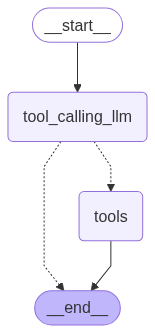

In [13]:

builder.add_edge(START, "tool_calling_llm")
builder.add_conditional_edges(
    "tool_calling_llm",
    tools_condition)
builder.add_edge("tools", END)

graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [14]:
messages = graph.invoke({"messages":"1760.0354"})
for m in messages["messages"]:
    m.pretty_print()

================================ Human Message =================================

1760.0354
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (7365q194d)
 Call ID: 7365q194d
  Args:
    query: What location corresponds to coordinate 1760.0354?
================================= Tool Message =================================
Name: tavily_search_results_json

[{"title": "Offline Learning for Sequence-Based Selection Hyper-Heuristics", "url": "https://search.proquest.com/openview/c8f25dacb34259b9a57e90baa02be1d4/1?pq-origsite=gscholar&cbl=51922&diss=y", "content": "This thesis presents a novel statistical framework for the offline learning of subsequences of low level heuristics in order to improve the optimisation", "score": 0.005188285}]


In [15]:
messages = graph.invoke({"messages":"Hi, I am deepak"})
for m in messages["messages"]:
    m.pretty_print()

================================ Human Message =================================

Hi, I am deepak
================================== Ai Message ==================================

Hello Deepak! Nice to meet you. How can I assist you today? Let me know if you have any questions or need help with anything! 😊
